# Regions data distribution
Differences in the distribution of the data to the target category are shown.

## Preparation
- Imports
- General auxiliary function

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from datetime import timedelta

def assign_target_category(row):
    if row['days_until_trending'] == 0: 
        return '0 Days'
    elif row['days_until_trending'] == 1:
        return '1 Day'
    elif row['days_until_trending'] == 2:
        return '2 Days'
    elif row['days_until_trending'] <= 5:
        return '3 - 5 Days'
    else:
        return '> 5 Days'

## DE
Data distribution for Germany.

In [2]:
df = pd.read_csv('../0_data/DEvideos.csv',
    low_memory=False)

df['trending_date'] = df.apply(lambda row: datetime.strptime(row['trending_date'], '%y.%d.%m'), axis=1)
df['publish_time'] = df.apply(lambda row: datetime.strptime(row['publish_time'], '%Y-%m-%dT%H:%M:%S.000Z'), axis=1)
df['days_until_trending'] = df.apply(lambda row: ((row['trending_date'] - row['publish_time']).days + 1), axis=1)
df['target_category'] = df.apply(assign_target_category, axis=1)
df['target_category'] = df['target_category'].astype('category')

days_until_trending_percentage = df['days_until_trending'].value_counts()
days_until_trending_percentage = days_until_trending_percentage.apply(lambda x: ( x / len(df) ) * 100).round(2)
days_until_trending_percentage = days_until_trending_percentage.sort_index(ascending=True)

target_category_percentage = df['target_category'].value_counts()
target_category_percentage = target_category_percentage.apply(lambda x: ( x / len(df) ) * 100).round(2)
target_category_percentage = target_category_percentage.sort_index(ascending=True)

### Days until trending
Much of the videos are trending after a day. More than five days are extremely rare.

<AxesSubplot:xlabel='days_until_trending', ylabel='percent'>

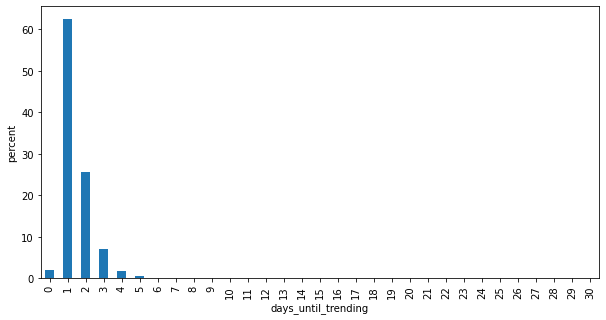

In [18]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
days_until_trending_percentage.filter(items=range(0,31)).plot.bar(xlabel='days_until_trending', ylabel='percent')

### Target category
Category "1 day" dominates. The remaining categories are fairly full, the marginal categories are very small.

<AxesSubplot:xlabel='target_category', ylabel='percent'>

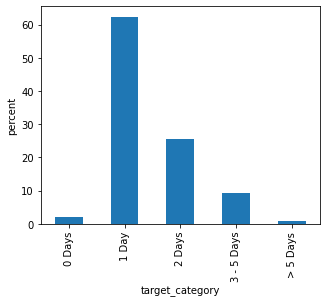

In [19]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 4)
target_category_percentage.plot.bar(xlabel='target_category', ylabel='percent')

## GB
Data distribution for Great Britan.

In [20]:
df = pd.read_csv('../0_data/GBvideos.csv',
    low_memory=False)

df['trending_date'] = df.apply(lambda row: datetime.strptime(row['trending_date'], '%y.%d.%m'), axis=1)
df['publish_time'] = df.apply(lambda row: datetime.strptime(row['publish_time'], '%Y-%m-%dT%H:%M:%S.000Z'), axis=1)
df['days_until_trending'] = df.apply(lambda row: ((row['trending_date'] - row['publish_time']).days + 1), axis=1)
df['target_category'] = df.apply(assign_target_category, axis=1)
df['target_category'] = df['target_category'].astype('category')

days_until_trending_percentage = df['days_until_trending'].value_counts()
days_until_trending_percentage = days_until_trending_percentage.apply(lambda x: ( x / len(df) ) * 100).round(2)
days_until_trending_percentage = days_until_trending_percentage.sort_index(ascending=True)

target_category_percentage = df['target_category'].value_counts()
target_category_percentage = target_category_percentage.apply(lambda x: ( x / len(df) ) * 100).round(2)
target_category_percentage = target_category_percentage.sort_index(ascending=True)

### Days until trending
Here the data is distributed much more widely. There is no clearly preferred number of days. Most videos go trending after two to ten days.

<AxesSubplot:xlabel='days_until_trending', ylabel='percent'>

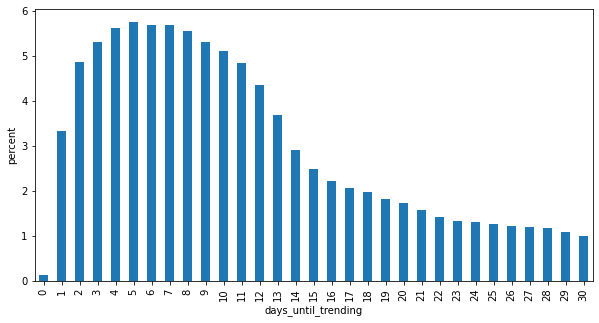

In [21]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
days_until_trending_percentage.filter(items=range(0,31)).plot.bar(xlabel='days_until_trending', ylabel='percent')

### Target category
Due to the much broader distribution and the low concentration on the first few days, the marginal category "> 5 days" is very well filled, the rest of them hardly show any data.

<AxesSubplot:xlabel='target_category', ylabel='percent'>

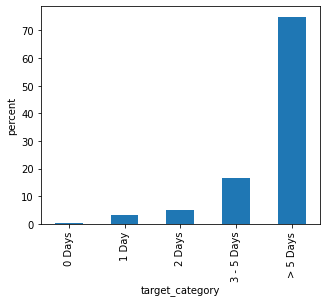

In [22]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 4)
target_category_percentage.plot.bar(xlabel='target_category', ylabel='percent')

## US
Data distribution for the United States of America.

In [23]:
df = pd.read_csv('../0_data/USvideos.csv',
    low_memory=False)

df['trending_date'] = df.apply(lambda row: datetime.strptime(row['trending_date'], '%y.%d.%m'), axis=1)
df['publish_time'] = df.apply(lambda row: datetime.strptime(row['publish_time'], '%Y-%m-%dT%H:%M:%S.000Z'), axis=1)
df['days_until_trending'] = df.apply(lambda row: ((row['trending_date'] - row['publish_time']).days + 1), axis=1)
df['target_category'] = df.apply(assign_target_category, axis=1)
df['target_category'] = df['target_category'].astype('category')

days_until_trending_percentage = df['days_until_trending'].value_counts()
days_until_trending_percentage = days_until_trending_percentage.apply(lambda x: ( x / len(df) ) * 100).round(2)
days_until_trending_percentage = days_until_trending_percentage.sort_index(ascending=True)

target_category_percentage = df['target_category'].value_counts()
target_category_percentage = target_category_percentage.apply(lambda x: ( x / len(df) ) * 100).round(2)
target_category_percentage = target_category_percentage.sort_index(ascending=True)

### Days until trending
The distribution of the US-related data is similar to that of the UK-related data. However, the distribution is not quite as wide. The high point here is two to six days.

<AxesSubplot:xlabel='days_until_trending', ylabel='percent'>

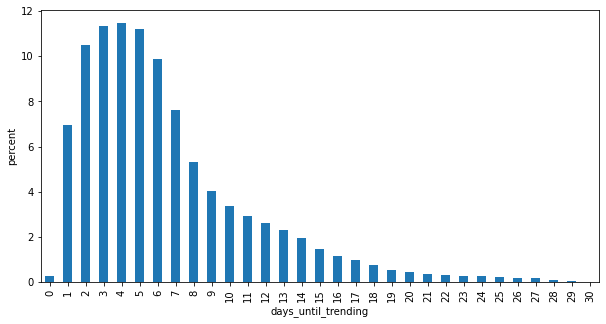

In [24]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
days_until_trending_percentage.filter(items=range(0,31)).plot.bar(xlabel='days_until_trending', ylabel='percent')

### Target category
Here, too, the marginal category "> 5 days" dominates, but the previous category also has a good amount of data.

<AxesSubplot:xlabel='target_category', ylabel='percent'>

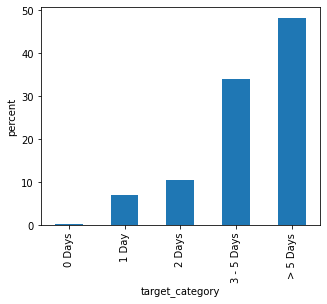

In [25]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 4)
target_category_percentage.plot.bar(xlabel='target_category', ylabel='percent')